In [2]:
import os
import pandas as pd
import numpy as np
import pymc as pm
#pm.clear_data()

#import importlib
import functions as func

In [3]:
#importlib.reload(func)

In [14]:
log_folder = '/Users/natapost/Documents/ultan_files/pl/logs_to_csv'
file_names = os.listdir(log_folder)
participants = []
for f in file_names:
    if f[0] != '.' and f[0] != 'd' and f[:2] != '12' and f[:2] != 'se':
        participants.append(f[:2])

difficulty_df = pd.read_csv(log_folder + '/' + 'difficult_ams.csv', index_col = 0)
print(participants)

['22', '08', '20', '21', '09', '19', '18', '16', '02', '03', '17', '01', '15', '04', '10', '11', '05', '13', '07', '06']


In [7]:
participant = '01'
df = pd.read_csv(log_folder + '/' + participant + '.csv')
df = func.getStageIndex(df)
df

,Unnamed: 0,time_stimuli_start,time_space,timestamp_stimuli_start,timestamp_key_pressed,RT,relevant_modality,stage,trial_n,go,key_pressed,correct,stage_trial
0,0,30.2595,NaN,1.683531e+09,NaN,NaN,AUD,training,1,True,False,0,1
1,1,32.5061,NaN,1.683531e+09,NaN,NaN,AUD,training,2,False,False,1,2
2,2,34.7921,NaN,1.683531e+09,NaN,NaN,AUD,training,3,False,False,1,3
3,3,36.9962,NaN,1.683531e+09,NaN,NaN,AUD,training,4,True,False,0,4
4,4,39.0667,NaN,1.683531e+09,NaN,NaN,AUD,training,5,False,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,235,560.6887,NaN,1.683536e+09,NaN,NaN,AUD,eds2,56,False,False,1,56
836,236,562.7528,NaN,1.683536e+09,NaN,NaN,AUD,eds2,57,True,False,0,57
837,237,565.1932,565.8951,1.683536e+09,1.683536e+09,0.7019,AUD,eds2,58,True,True,1,58
838,238,567.4730,NaN,1.683536e+09,NaN,NaN,AUD,eds2,59,False,False,1,59


In [16]:
outcome_folder = 'outcomes_binomial_beta_prior_all_trials'
outcome_folder_files = os.listdir(outcome_folder + '/tables')
stages = ['ids1','eds1', 'ids2', 'eds2']
title = 'all_trials'
done_files = []


for participant in participants:
    if participant != '18':
        pass
    else:
        continue

    print('                 -----------!!!!-----------')
    print('Analysing participant', participant)
    print('log_file:', participant + '.csv')
    df = pd.read_csv(log_folder + '/' + participant + '.csv')
    df = func.getStageIndex(df)
    
    for stage in stages:
        trial_n = []
        means = []
        hdi_3_all = []
        hdi_97_all = []
        csv_file_name = participant + '_' + stage + '.csv'
        print(csv_file_name)
        if csv_file_name in outcome_folder_files:
            print('this stage has been already done')
            continue
        else:
            progress_df = pd.DataFrame()
            print(f'creating a new file for participant {participant} stage {stage}')

        df_stage = df[df.stage == stage]
        observed_data = []

        for index, row in df_stage.iterrows():

            print(' ')
            print('trial', row.stage_trial)
            trial_n.append(row.stage_trial)
            observed_data.append(row.correct)
            print('observed data', observed_data)
            mean, hdi_3, hdi_97 = func.distribution_update(observed_data)
            means.append(mean)
            hdi_3_all.append(hdi_3)
            hdi_97_all.append(hdi_97)

        go_trials = df_stage[df_stage.go == True].stage_trial
        func.graph_plotting(trial_n, means, hdi_3_all, hdi_97_all, observed_data, participant, stage, go_trials, title, outcome_folder)
        progress_df['trial_n'] = trial_n
        progress_df[f'{stage}_mean'] = means
        progress_df[f'{stage}_hdi_3'] = hdi_3_all
        progress_df[f'{stage}_hdi_97'] = hdi_97_all
        #print(progress_df)
        progress_df.to_csv(outcome_folder + '/' + csv_file_name)

        #break
    done_files.append(participant)
    done_files.sort()
    print(' ')
    print('done files:', done_files)
    #break

                 -----------!!!!-----------
Analysing participant 22
log_file: 22.csv
22_ids1.csv
this stage has been already done
22_eds1.csv
this stage has been already done
22_ids2.csv
this stage has been already done
22_eds2.csv
this stage has been already done
 
done files: ['22']
                 -----------!!!!-----------
Analysing participant 08
log_file: 08.csv
08_ids1.csv
this stage has been already done
08_eds1.csv
this stage has been already done
08_ids2.csv
this stage has been already done
08_eds2.csv
this stage has been already done
 
done files: ['08', '22']
                 -----------!!!!-----------
Analysing participant 20
log_file: 20.csv
20_ids1.csv
this stage has been already done
20_eds1.csv
this stage has been already done
20_ids2.csv
this stage has been already done
20_eds2.csv
this stage has been already done
 
done files: ['08', '20', '22']
                 -----------!!!!-----------
Analysing participant 21
log_file: 21.csv
21_ids1.csv
this stage has been alr

## Plots

found the right file!


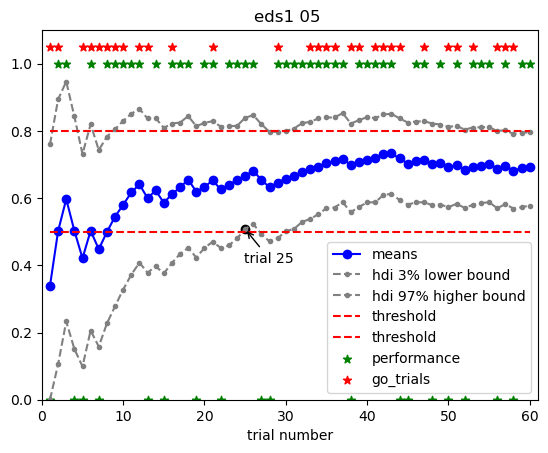

done plotting


In [5]:
import os
import pandas as pd
import functions as func

outcome_folder = 'outcomes_binomial_beta_prior_all_trials/new_fixed'
#outcome_folder_files = os.listdir(outcome_folder)
#stages = ['ids1','eds1', 'ids2', 'eds2']
title = ''

log_folder = '/Users/natapost/Documents/ultan_files/pl/logs_to_csv'
csv_folder = 'outcomes_binomial_beta_prior_all_trials/tables'
csvs = os.listdir(csv_folder)


participant = '05'
stage = 'eds1'

for csv in csvs:
    if participant == csv.split('_')[0]:
        if stage == csv.split('_')[1].split('.')[0]:
            pass
        else:
            continue
    else:
        continue
    
    print('found the right file!')
    path = os.path.join(csv_folder, csv)
    df_csv = pd.read_csv(path)    
        
    df_log = pd.read_csv(log_folder + '/' + participant + '.csv')
    df_log = func.getStageIndex(df_log)
    
    trial_n = []
    means = []
    hdi_3_all = []
    hdi_97_all = []
    df_stage = df_log[df_log.stage == stage]
    observed_data = []

    for index, row in df_stage.iterrows():

        #print(' ')
        #print('trial', row.stage_trial)
        trial_n.append(row.stage_trial)
        observed_data.append(row.correct)
        #print('observed data', observed_data)

    means = df_csv[df_csv.columns[2]]
    hdi_3_all = df_csv[df_csv.columns[3]]
    hdi_97_all = df_csv[df_csv.columns[4]]
    go_trials = df_stage[df_stage.go == True].stage_trial
    func.graph_plotting(trial_n, means, hdi_3_all, hdi_97_all, observed_data, stage, participant, go_trials, title, outcome_folder)
    print('done plotting')
